----
# Full-LDA 14d classification using sklearn library different prior

----

In [31]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Use noisy data sets
noise = False

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/soltani_14d_{'' if noise else 'no'}noise_1200.csv")
vld_data = pd.read_csv(f"../ValidationData/neodata/soltani_14d_{'' if noise else 'no'}noise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/soltani_14d_{'' if noise else 'no'}noise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data



In [33]:
#reduce to 8 "relevant" features

features = ['T0', 'Tc', 'Tdis', 'Tret', 'Tsuc', 'Tsup', 'CondFan', 'Tset']

X_trn = X_trn[features]
X_vld = X_vld[features]
X_tst = X_tst[features]

X_trn

,T0,Tc,Tdis,Tret,Tsuc,Tsup,CondFan,Tset
0,-7.327275,35.250968,62.398172,9.213731,5.218196,-0.007051,91.677418,0
1,8.350783,32.555930,36.902906,19.335149,14.454287,12.023629,61.732558,12
2,4.392486,31.320564,38.446461,12.682279,9.347677,7.049683,48.006264,7
3,7.719790,33.308655,39.283819,20.119498,14.619819,12.022797,70.096165,12
4,-1.469814,37.019220,58.629453,17.894334,11.548947,7.004961,100.000000,7
...,...,...,...,...,...,...,...,...
25195,7.856815,39.778347,47.529844,19.876503,14.828438,11.999965,20.000000,12
25196,4.275137,35.262560,43.769530,12.705745,9.757985,7.001411,18.361243,7
25197,-1.892760,50.880948,78.212833,17.463716,12.245503,6.993503,20.000000,7
25198,-3.062182,35.815355,53.906534,5.812675,3.552730,-0.000118,19.589677,0


## Standardize data

In [34]:
# Use standard scaler for scaling
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()

# # Use PCA sphering/whitening for scaling
# from sklearn.decomposition import PCA
# standardizer = PCA(whiten=True)

X_trn = standardizer.fit_transform(X_trn)
X_vld = standardizer.transform(X_vld)
X_tst = standardizer.transform(X_tst)

## LDA dimensionality reduction

In [35]:
import lda
"""

reducer = lda.reducer(X_trn,y_trn,5)

X_vld = reducer.transform(X_vld)
X_tst = reducer.transform(X_tst)
X_trn = reducer.transform(X_trn)
"""



'\n\nreducer = lda.reducer(X_trn,y_trn,5)\n\nX_vld = reducer.transform(X_vld)\nX_tst = reducer.transform(X_tst)\nX_trn = reducer.transform(X_trn)\n'

---

# LDA fitting

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

import csv

from sklearn.metrics import confusion_matrix as cf

#Making a header to be written to a file
header=['prior for non faulty data', 'accuracy','false positive']

#Opening the file to be written to
f = open('acc_prior_change.csv', 'w', encoding='UTF8', newline='' )
writer = csv.writer(f)
# write the header
writer.writerow(header)


   
#Making a for loop to use different priors. 
for x in np.arange(0, 1.001, 0.001):

    #definer priors
    non_fault_prior=x
    fault_prior=(1-non_fault_prior)/20
    prior=np.array([non_fault_prior, fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,])

    #Training LDA classifier with priors 
    clf = LinearDiscriminantAnalysis(priors=prior)
    clf.fit(X_trn, y_trn)

    #Predication and calucting accuracy score
    pred=clf.predict(X_trn)
    
    
    #Calcultating false positive score
    cond = cf(y_trn,pred)
    
    false = 1-cond[0,0]/1200 
    #Cacultating accuarcy 
    ac=accuracy_score(y_trn, pred)
    #Writing to a file
    res=[x,ac,false]
    writer.writerow(res)
     


f.close()



c:\Users\klepa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:524: RuntimeWarning: divide by zero encountered in log
  self.intercept_ = -0.5 * np.sum(coef**2, axis=1) + np.log(self.priors_)
c:\Users\klepa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:517: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(S**2))[
c:\Users\klepa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:524: RuntimeWarning: divide by zero encountered in log
  self.intercept_ = -0.5 * np.sum(coef**2, axis=1) + np.log(self.priors_)


# Classifying test data

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Full-LDA 8d different priori on test set : Accuracy 85.714%'}, xlabel='Predicted class', ylabel='True class'>)

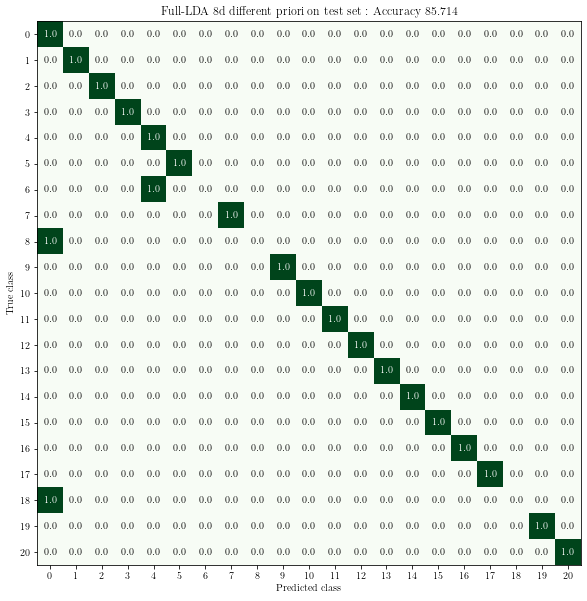

In [37]:
#Using a found good prior and testning the outcome on the test data. 

#Chosing prior and training the 5LDA classifier
non_fault_prior=0.05
fault_prior=(1-non_fault_prior)/20
prior=np.array([non_fault_prior, fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,])

clf = LinearDiscriminantAnalysis(priors=prior)
clf.fit(X_trn, y_trn)


# Make predictions for the training set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_tst = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_tst, figsize = (10,10),title='Full-LDA 8d different priori on test set', save_fig_name='Full-LDA 8d different prior test confusion matrix.pdf',eval_labels = False)